# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import mean
from numpy import absolute
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Data

In [2]:
daily_DMC=pd.read_csv("daily_DMC.csv")

In [3]:
y=daily_DMC.pop("Drought_Level")
x=daily_DMC[["AWND","PRCP","SNOW","SNWD","TMAX","TMIN"]].copy()

In [4]:
train_X,test_X,train_Y,test_Y=train_test_split(x,y,test_size=0.25,shuffle=False)

In [5]:
train_X_norm=preprocessing.normalize(train_X)
test_X_norm=preprocessing.normalize(test_X)

# Models

In [6]:
kf = KFold(n_splits=5)

# Logistic Regression

In [7]:
M1_Score = cross_val_score(LogisticRegression(max_iter=175), train_X_norm, train_Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {M1_Score}')
print(mean(absolute(M1_Score)))

Scores for each fold are: [0.42811755 0.48768864 0.85146942 0.47180302 0.70588235]
0.588992197355511


In [8]:
M1= LogisticRegression(max_iter=175)
M1.fit(train_X_norm,train_Y)

LogisticRegression(max_iter=175)

In [9]:
M1_prediction=M1.predict(test_X_norm)

In [10]:
ACC_1=accuracy_score(test_Y,M1_prediction)
print("Accuracy Score: %.2f" % ACC_1)
print(classification_report(test_Y,M1_prediction,labels=np.unique(test_Y)))

Accuracy Score: 0.70
              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82      1463
         1.0       0.00      0.00      0.00       322
         2.0       0.00      0.00      0.00       202
         3.0       0.00      0.00      0.00       112

    accuracy                           0.70      2099
   macro avg       0.17      0.25      0.21      2099
weighted avg       0.49      0.70      0.57      2099



C:\Users\kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# k-Nearest Neighbors

In [11]:
M2_Score = cross_val_score(KNeighborsClassifier(n_neighbors=17), train_X_norm, train_Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {M2_Score}')
print(mean(absolute(M2_Score)))

Scores for each fold are: [0.42891183 0.47577442 0.80063542 0.48054011 0.69157393]
0.5754871443887003


In [12]:
M2=KNeighborsClassifier(n_neighbors=17)
M2.fit(train_X_norm,train_Y)

KNeighborsClassifier(n_neighbors=17)

In [13]:
M2_prediction=M2.predict(test_X_norm)

In [14]:
ACC_2=accuracy_score(test_Y,M2_prediction)
print("Accuracy Score: %.2f" % ACC_2)
print(classification_report(test_Y,M2_prediction,labels=np.unique(test_Y)))

Accuracy Score: 0.68
              precision    recall  f1-score   support

         0.0       0.70      0.96      0.81      1463
         1.0       0.22      0.05      0.09       322
         2.0       0.29      0.01      0.02       202
         3.0       0.00      0.00      0.00       112

    accuracy                           0.68      2099
   macro avg       0.30      0.26      0.23      2099
weighted avg       0.55      0.68      0.58      2099



# Decision Trees

In [15]:
M3_score = cross_val_score(DecisionTreeClassifier(), train_X, train_Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {M3_score}')
print(mean(absolute(M3_score)))

Scores for each fold are: [0.34074662 0.36854647 0.45274027 0.35345512 0.44435612]
0.3919689207499328


In [16]:
M3=DecisionTreeClassifier()
M3.fit(train_X,train_Y)

DecisionTreeClassifier()

In [17]:
M3_prediction=M3.predict(test_X)

In [18]:
ACC_3=accuracy_score(test_Y,M3_prediction)
print("Accuracy Score: %.2f" % ACC_3)
print(classification_report(test_Y,M3_prediction,labels=np.unique(test_Y)))

Accuracy Score: 0.46
              precision    recall  f1-score   support

         0.0       0.71      0.59      0.65      1463
         1.0       0.16      0.23      0.19       322
         2.0       0.15      0.11      0.13       202
         3.0       0.03      0.04      0.04       112

   micro avg       0.49      0.46      0.47      2099
   macro avg       0.26      0.25      0.25      2099
weighted avg       0.54      0.46      0.49      2099



# Random Forest

In [19]:
M4_score = cross_val_score(RandomForestClassifier(), train_X, train_Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {M4_score}')
print(mean(absolute(M4_score)))

Scores for each fold are: [0.4050834  0.43923749 0.6878475  0.43764893 0.62082671]
0.5181288048783259


In [20]:
M4=RandomForestClassifier()
M4.fit(train_X,train_Y)

RandomForestClassifier()

In [21]:
M4_prediction=M4.predict(test_X)

In [22]:
ACC_4=accuracy_score(test_Y,M4_prediction)
print("Accuracy Score: %.2f" % ACC_4)
print(classification_report(test_Y,M4_prediction,labels=np.unique(test_Y)))

Accuracy Score: 0.61
              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77      1463
         1.0       0.16      0.11      0.14       322
         2.0       0.17      0.03      0.06       202
         3.0       0.00      0.00      0.00       112

   micro avg       0.62      0.61      0.61      2099
   macro avg       0.26      0.25      0.24      2099
weighted avg       0.53      0.61      0.56      2099



# Model Evaluations

In [23]:
summary = pd.DataFrame({'Type':['Logistic Regression', 'k-Nearest Neighbors', 'Decision Tree','Random Forest'],
                   'Accuracy Score':[ACC_1, ACC_2, ACC_3, ACC_4]})
summary

,Type,Accuracy Score
0,Logistic Regression,0.696999
1,k-Nearest Neighbors,0.678418
2,Decision Tree,0.460219
3,Random Forest,0.610767


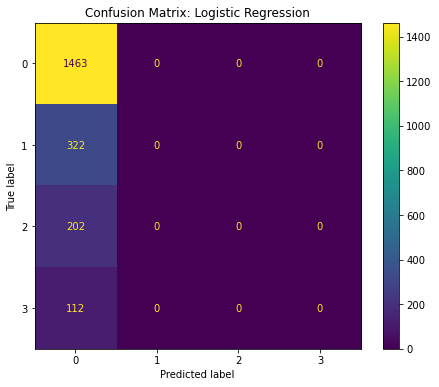

In [24]:
confusion_matrix = metrics.confusion_matrix(test_Y, M1_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
ax.set(title='Confusion Matrix: Logistic Regression')
cm_display.plot(ax=ax)
plt.show()

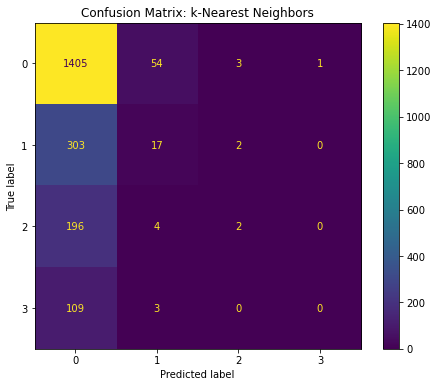

In [25]:
confusion_matrix = metrics.confusion_matrix(test_Y, M2_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
ax.set(title='Confusion Matrix: k-Nearest Neighbors')
cm_display.plot(ax=ax)
plt.show()

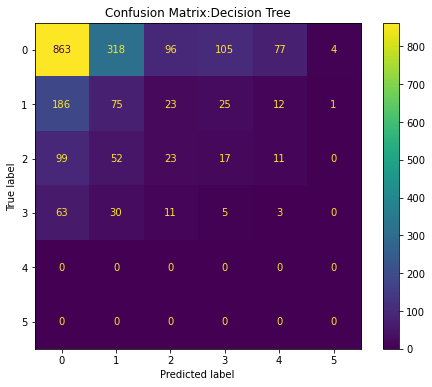

In [26]:
confusion_matrix = metrics.confusion_matrix(test_Y, M3_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
ax.set(title='Confusion Matrix:Decision Tree')
cm_display.plot(ax=ax)
plt.show()

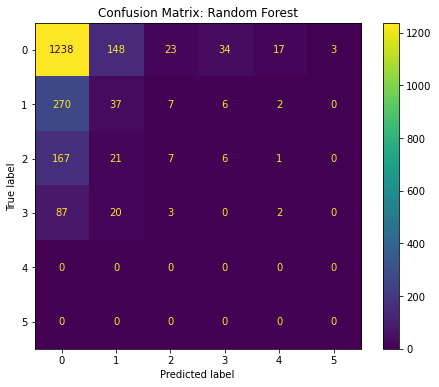

In [27]:
confusion_matrix = metrics.confusion_matrix(test_Y, M4_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
ax.set(title='Confusion Matrix: Random Forest')
cm_display.plot(ax=ax)
plt.show()